In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('max_row', None)
pd.set_option('display.expand_frame_repr', False)


In [4]:
df = pd.read_csv('clean_salary_data.csv')
df2 = df.drop_duplicates()

In [5]:
df2['age'] = df2.Founded.apply(lambda x: x if x <1 else 2021 - x)

C:\Users\jjcas\AppData\Local\Temp/ipykernel_2252/4157498090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = df2.Founded.apply(lambda x: x if x <1 else 2021 - x)


<AxesSubplot:>

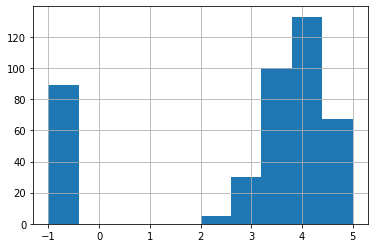

In [6]:
df2.Rating.hist()

<AxesSubplot:>

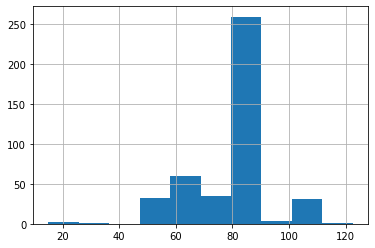

In [7]:
df2.avg_salary.hist()

<AxesSubplot:>

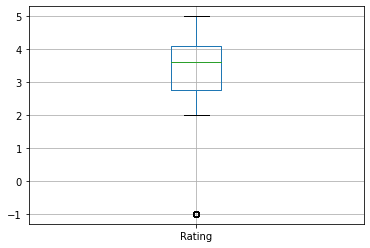

In [8]:
df2.boxplot(column= 'Rating')

In [9]:
df2[['age', 'avg_salary', 'Rating']].corr()

,age,avg_salary,Rating
age,1.000000,-0.012909,0.393862
avg_salary,-0.012909,1.000000,0.093106
Rating,0.393862,0.093106,1.000000


<AxesSubplot:>

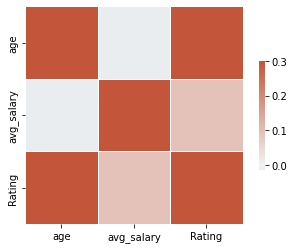

In [10]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df2[['age', 'avg_salary', 'Rating']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
pd.pivot_table(df2, index= 'job_state', values= "avg_salary").sort_values('avg_salary', ascending= False)

,avg_salary
job_state,
KY,102.500000
TN,87.500000
HI,87.500000
ME,87.500000
SC,85.250000
PA,85.214286
IL,84.625000
DC,83.400000
OH,83.125000


In [12]:
pd.pivot_table(df2, index= 'job_state', values = 'Job Title', aggfunc= 'count').sort_values('Job Title', ascending= False)

,Job Title
job_state,
Remote,67
CA,48
NY,47
FL,41
VA,23
TX,20
MA,19
OH,19
NJ,16


In [13]:
df2.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_name', 'job_state',
       'python', 'excel', 'sql', 'age'],
      dtype='object')

In [14]:
df2_pivots = df2[['Industry', 'Sector', 'Revenue', 'excel', 'python', 'Type of ownership', 'avg_salary']]

In [15]:
for i in df2_pivots.columns:
    try:
        print(i)
        print(pd.pivot_table(df2_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))
    except Exception:
        pass

Industry
                                         avg_salary
Industry                                           
Utilities                                102.500000
Airlines                                  90.000000
Research & Development                    87.500000
Other Retail Stores                       87.500000
Staffing & Outsourcing                    85.754717
Industrial Manufacturing                  85.250000
Beauty & Personal Accessories Stores      85.200000
Logistics & Supply Chain                  84.500000
Internet                                  84.050000
Aerospace & Defense                       83.875000
Biotech & Pharmaceuticals                 83.000000
IT Services                               82.242424
Insurance Carriers                        81.615385
Consulting                                80.214286
Health Care Services & Hospitals          79.923077
Advertising & Marketing                   78.714286
Accounting                                78.333333
Com

<AxesSubplot:xlabel='job_state', ylabel=' Total jobs'>

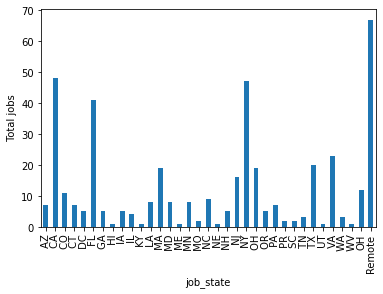

In [36]:
df2.groupby('job_state').size().plot.bar(ylabel=" Total jobs")

In [17]:
df2.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_name', 'job_state',
       'python', 'excel', 'sql', 'age'],
      dtype='object')

<AxesSubplot:xlabel='job_state', ylabel='Average Salary'>

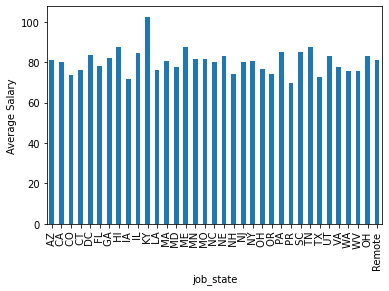

In [33]:
df2.groupby('job_state')['avg_salary'].mean().plot.bar(ylabel="Average Salary")